# Regression Model 

The aim with data this dataset is to create a predicitve model on sklearn california housing dataset- this notebook will go through the process of:
- Data Cleaning
- Data Analysis
- Training model
- XGBoost Regressor
- Evaluation 

### Importing Dependancies 

In [1]:
#importing modules I would like to use for my analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
from xgboost import XGBRegressor

### Loading the dataset

In [3]:
file_path = 'housing.csv'  # File in the same directory
df = pd.read_csv(file_path)
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [33]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [34]:
# drop the missing data
housing_dataset = df.dropna()

In [35]:
housing_dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [36]:
housing_dataset.shape

(20433, 10)

In [21]:
#stats for the data
housing_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Understanding the correlation between the various features 

1. Positive Correlation
2. Negative Correlation 

In [14]:
housing_dataset.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [16]:
#removing non numberical columns so I can look into correlation 
housing_corr = housing_dataset.select_dtypes(include=[np.float64])
housing_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [17]:
correlation = housing_corr.corr()

<Axes: >

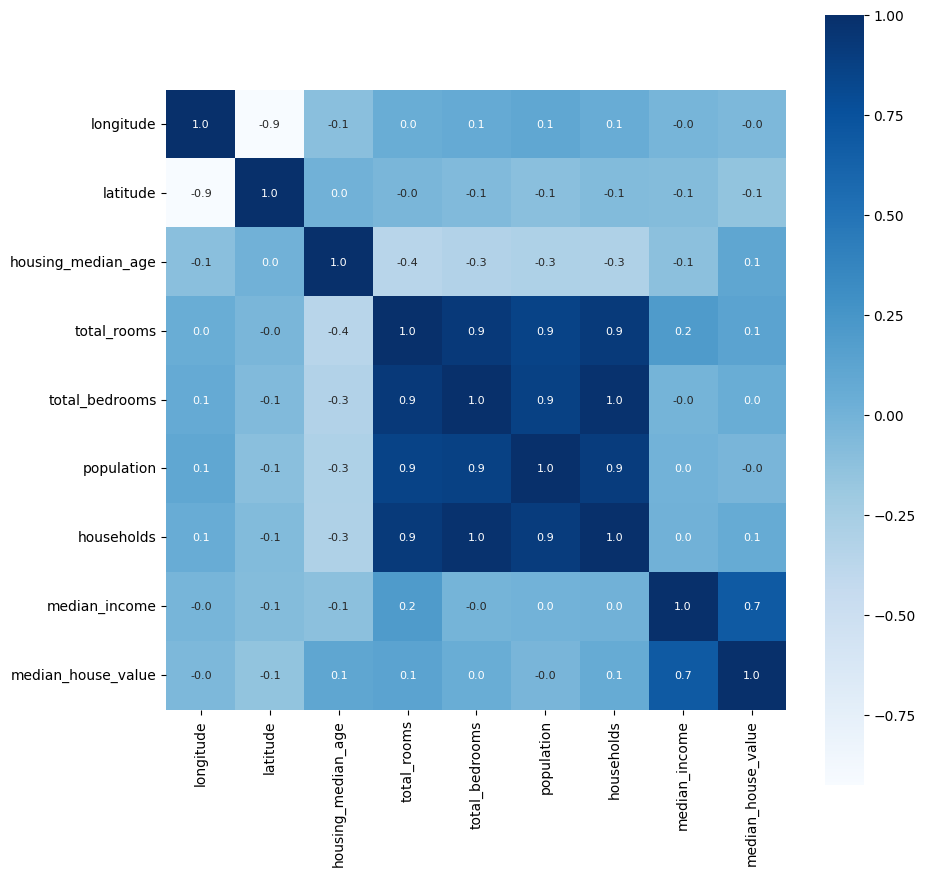

In [19]:
#visualiing correlation in a heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

incorperating the ocean proximity into the df 

In [37]:
# Converting categorical values to numeric values 
housing_dataset = pd.get_dummies(housing_dataset, columns= ['ocean_proximity'])

In [39]:
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [54]:
# Convert all boolean columns to 1 and 0
housing_dataset = housing_dataset.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [55]:
housing_dataset.dtypes

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN       int64
ocean_proximity_INLAND          int64
ocean_proximity_ISLAND          int64
ocean_proximity_NEAR BAY        int64
ocean_proximity_NEAR OCEAN      int64
dtype: object

In [56]:
#recreating a corr graph 
correlation_1 = housing_dataset.corr()

<Axes: >

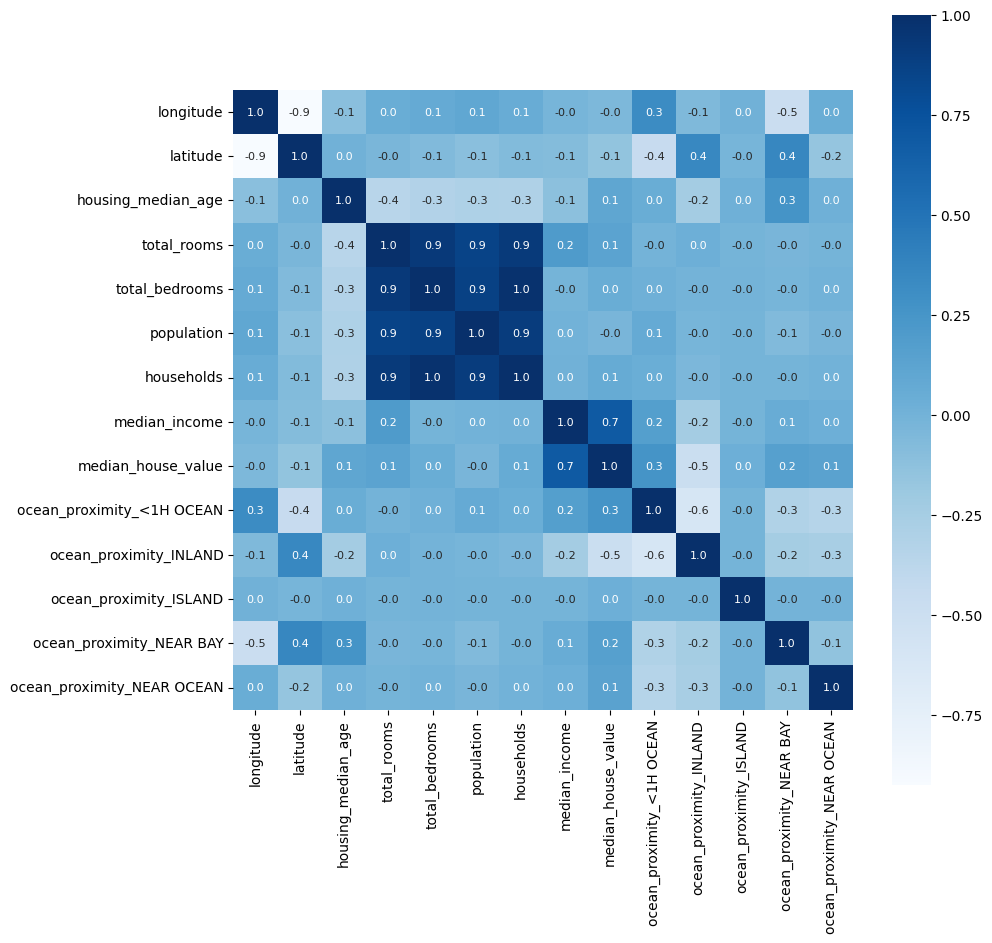

In [57]:
#visualiing correlation in a heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(correlation_1, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

splitting the data and target 

In [62]:
X = housing_dataset.drop(['median_house_value'], axis = 1)
Y = housing_dataset['median_house_value']

In [63]:
# print(X)
# print(Y)

splitting the data into Training data and Test data 

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=2)

In [65]:
print(X.shape, X_train.shape, X_test.shape)

(20433, 13) (16346, 13) (4087, 13)


Model Training 

XGBoost Regressor

In [45]:
#loading the model 
model = XGBRegressor()

In [78]:
#Identifying whhat special charecters are affecting the model 
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_1H_OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR_BAY',
       'ocean_proximity_NEAR_OCEAN'],
      dtype='object')

In [79]:
#to remove the '<' and the spaces in the column names 
X_train.columns = X_train.columns.str.replace('<', '', regex=True)
X_train.columns = X_train.columns.str.replace(' ', '_', regex=True)

In [80]:
#training the model with x train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

evaluating the model 

prediction on the training data 

In [87]:
#accuracy for prediction on training data 
training_data_prediction= model.predict(X_train)

In [88]:
training_data_prediction

array([ 79950.94, 427620.53, 361620.25, ..., 136979.25, 188609.81,
       136163.66], dtype=float32)

In [89]:
#r squared error - you want the number to be close to zero as much as possible 
score_1 = metrics.r2_score(Y_train, training_data_prediction)


#mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)


print('R squared error :', score_1)
print('Mean absolute error:', score_2)

R squared error : 0.9390458342845345
Mean absolute error: 20107.890944745657


visualising the prices 

<function matplotlib.pyplot.show(close=None, block=None)>

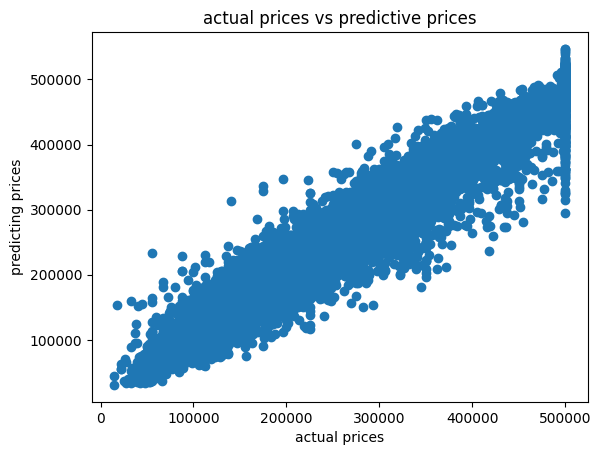

In [95]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('actual prices')
plt.ylabel('predicting prices')
plt.title('actual prices vs predictive prices')
plt.show

prediction on test data 

In [91]:
#to remove the '<' and the spaces in the column names 
X_test.columns = X_test.columns.str.replace('<', '', regex=True)
X_test.columns = X_test.columns.str.replace(' ', '_', regex=True)

In [92]:
#accuracy for prediction on training data 
test_data_prediction= model.predict(X_test)

In [93]:
#r squared error - you want the number to be close to zero as much as possible 
score_1 = metrics.r2_score(Y_test, test_data_prediction)


#mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [94]:
print('R squared error :', score_1)
print('Mean absolute error:', score_2)

R squared error : 0.8233248942600621
Mean absolute error: 31644.37365331386


<function matplotlib.pyplot.show(close=None, block=None)>

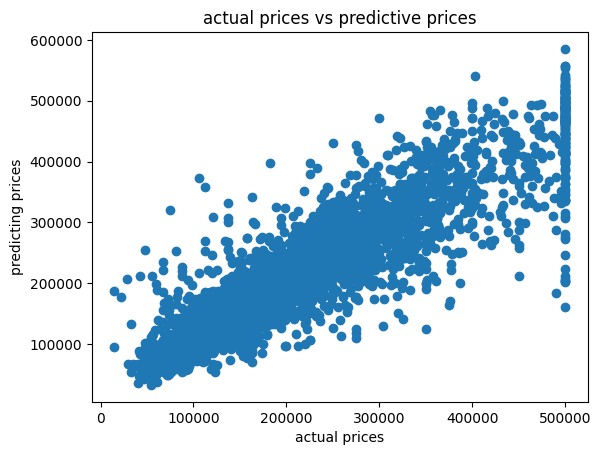

In [96]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('actual prices')
plt.ylabel('predicting prices')
plt.title('actual prices vs predictive prices')
plt.show